In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0,10.0)

In [ ]:
df = pd.read_csv('headbrain.csv')
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [ ]:
Q1 = df['Head Size(cm^3)'].quantile(0.25)
Q3 = df['Head Size(cm^3)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Head Size(cm^3)'] >= lower_bound) & (df['Head Size(cm^3)'] <= upper_bound)]

print("Original DataFrame shape:", df.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)

X = df_no_outliers['Head Size(cm^3)'].values
y = df_no_outliers['Brain Weight(grams)'].values

Original DataFrame shape: (237, 4)
DataFrame shape after removing outliers: (236, 4)


In [ ]:
# X = df['Head Size(cm^3)'].values
# y = df['Brain Weight(grams)'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
def standardize_data(X_train, X_test):
    X_train_mean = np.mean(X_train)
    X_train_std = np.std(X_train)

    X_train = (X_train - X_train_mean) / X_train_std
    X_test = (X_test - X_train_mean) / X_train_std

    return X_train, X_test

X_train, X_test = standardize_data(X_train, X_test)

In [ ]:
def predict(x, w, b):
  return np.dot(x, w) + b

In [ ]:
def compute_coefficients(X_train, y_train):
  n = len(X_train)
  X_mean = np.mean(X_train)
  y_mean = np.mean(y_train)

  numerator = 0
  denominator = 0

  for i in range(n):
    numerator += (X_train[i] - X_mean) * (y_train[i] - y_mean)
    denominator += (X_train[i] - X_mean) ** 2

  slope = numerator / denominator
  intercept = y_mean - slope * X_mean

  return slope, intercept

In [ ]:
w, b = compute_coefficients(X_train, y_train)
y_pred = predict(X_test, w, b)

In [ ]:
print(w, b)

93.89858213597286 1277.7848101265822


In [ ]:
def evaluate_ols(y_test, y_pred):
  mse = np.mean((y_test - y_pred) ** 2)
  rmse = np.sqrt(mse)
  r2 = 1 - (np.sum((y_test - y_pred) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
  return mse, rmse, r2

mse, rmse, r2 = evaluate_ols(y_test, y_pred)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("R2: ", r2)

MSE:  5487.756625470549
RMSE:  74.07939406792248
R2:  0.6070145271939049


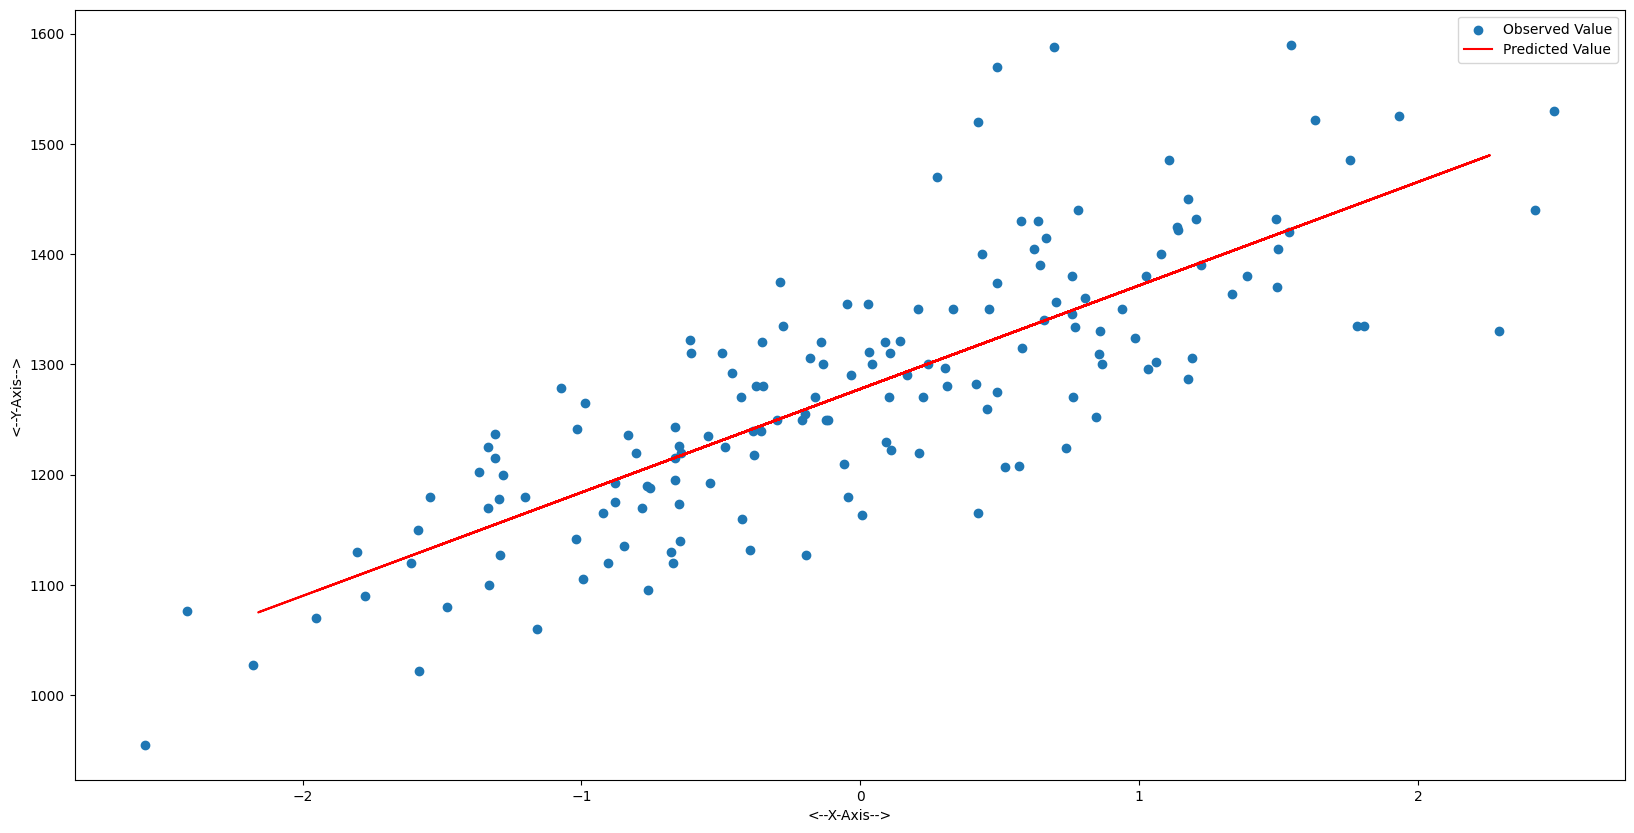

In [ ]:
plt.scatter(X_train, y_train, label='Observed Value')
plt.plot(X_test, y_pred, label='Predicted Value', color='red')
plt.xlabel('<--X-Axis-->')
plt.ylabel('<--Y-Axis-->')
plt.legend()
plt.show()

In [ ]:
## Using Gradient Descent

In [ ]:
def initialize(num_features):
    w = np.random.rand(num_features)  # shape: (num_features,)
    b = np.random.rand()
    return w, b

In [ ]:
def compute_cost(y_true, y_pred):
    m = len(y_true)
    cost = (1 / (2 * m)) * np.sum((y_pred - y_true) ** 2)
    return cost

In [ ]:
def predict_y(X_train, w, b):
    return np.dot(X_train, w) + b  # works for 1D and multi-D

In [ ]:
def update_parameters(X_train, y_true, y_pred, w, b, learning_rate):
    m = len(y_true)
    db = np.sum(y_pred - y_true) / m
    dw = np.dot(X_train.T, (y_pred - y_true)) / m  # shape (num_features,)
    w -= learning_rate * dw
    b -= learning_rate * db
    return w, b

In [ ]:
def run_gradient_descent(X_train, y_true, learning_rate, max_iterations, stopping_threshold=1e-6):
    num_features = X_train.shape[1]  # number of columns
    w, b = initialize(num_features)
    previous_cost = None
    cost_history = []

    for itr in range(max_iterations):
        y_pred = predict_y(X_train, w, b)
        cost = compute_cost(y_true, y_pred)

        cost_history.append(cost)  # store cost each iteration

        # Print progress every 100 iterations
        if (itr + 1) % 100 == 0 or itr == 0:
            print(f"Iteration {itr+1}/{max_iterations} - Cost: {cost:.6f} - Weights: {w} - Bias: {b:.4f}")

        # Early stopping
        if previous_cost and abs(previous_cost - cost) <= stopping_threshold:
            print(f"Early stopping at iteration {itr+1} with cost change {abs(previous_cost - cost):.8f}")
            break

        previous_cost = cost

        # Update parameters
        w, b = update_parameters(X_train, y_true, y_pred, w, b, learning_rate)

    return w, b, cost_history

Iteration 1/5000 - Cost: 822796.739020 - Weights: [0.37373614] - Bias: 0.3838
Iteration 100/5000 - Cost: 2578.432726 - Weights: [93.31572257] - Bias: 1269.8239
Iteration 200/5000 - Cost: 2546.575720 - Weights: [93.8951313] - Bias: 1277.7377
Early stopping at iteration 247 with cost change 0.00000097

Single Feature Dataset Final Results:
Learned weights: [93.89827244]
Learned bias: 1277.780580186959
Final cost: 2546.574612


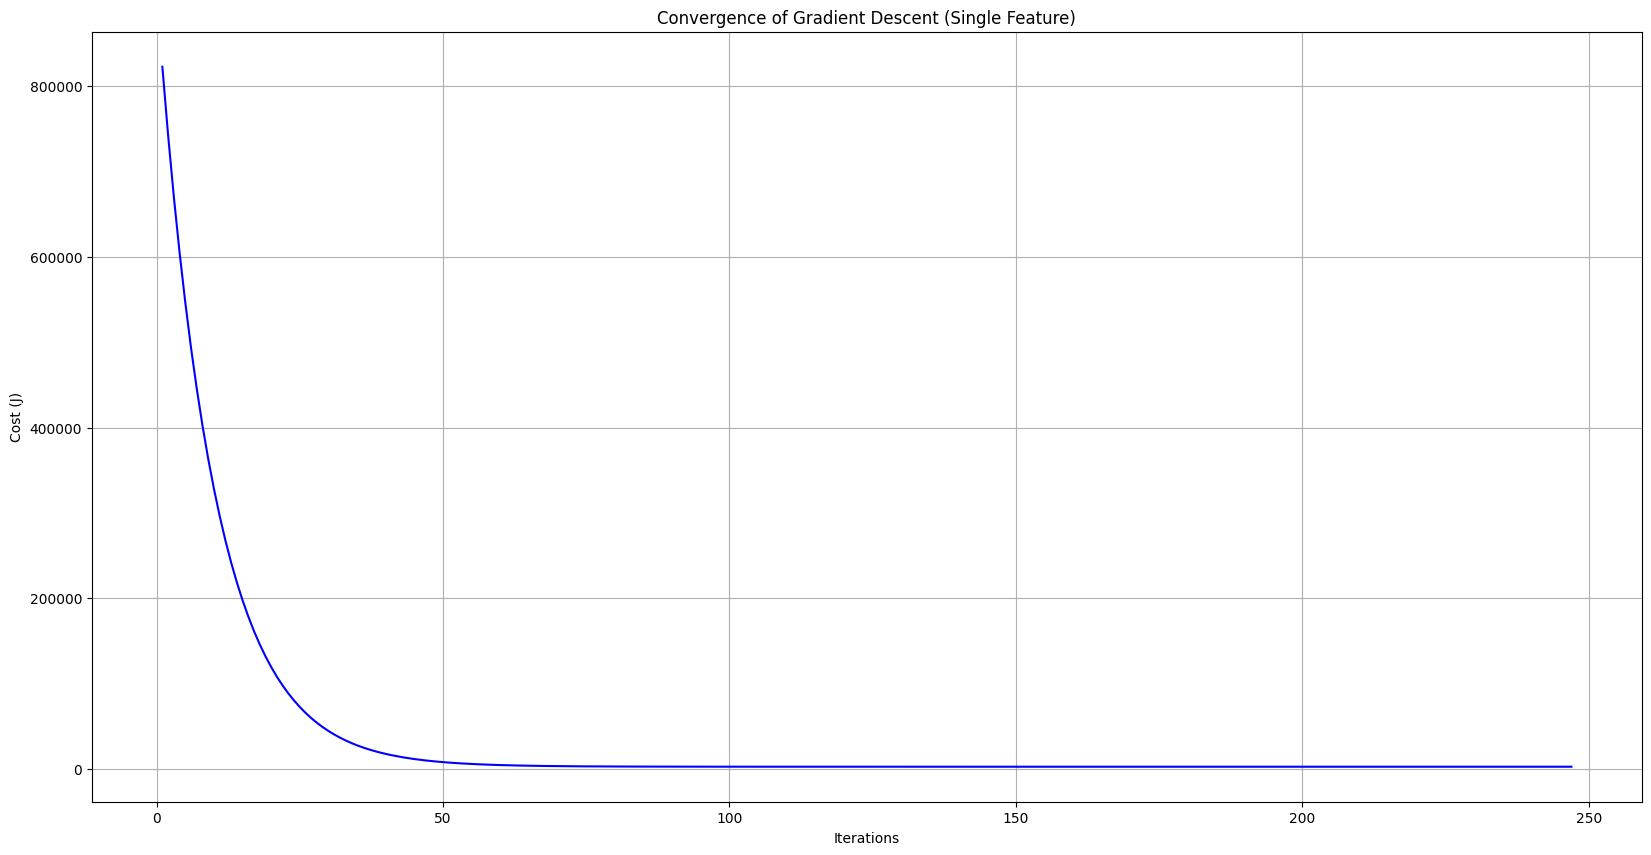

In [ ]:
learning_rate = 0.05
iterations = 5000

# Train model
w, b, cost_history = run_gradient_descent(X_train.reshape(-1, 1), y_train, learning_rate, iterations)

print("\nSingle Feature Dataset Final Results:")
print(f"Learned weights: {w}")
print(f"Learned bias: {b}")
print(f"Final cost: {cost_history[-1]:.6f}")

# Plot convergence
plt.plot(range(1, len(cost_history) + 1), cost_history, color='blue')
plt.grid()
plt.xlabel('Iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of Gradient Descent (Single Feature)')
plt.show()

In [ ]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def r2_score(y_true, y_pred):
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

y_pred_test = predict_y(X_test.reshape(-1, 1), w, b)
mse = mean_squared_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print("\nModel Evaluation (Test Data):")
print(f"MSE  : {mse:.6f}")
print(f"RMSE : {rmse:.6f}")
print(f"MAE  : {mae:.6f}")
print(f"R²   : {r2:.6f}")



Model Evaluation (Test Data):
MSE  : 5487.850007
RMSE : 74.080024
MAE  : 59.245742
R²   : 0.607008
